In [26]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
from scipy import stats

In [27]:
train = pd.read_csv("/Users/hanjingshi/Desktop/FALL2022/580_final/train.csv")
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [28]:
test = pd.read_csv("/Users/hanjingshi/Desktop/FALL2022/580_final/test.csv")
test.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [29]:
final = pd.read_csv("/Users/hanjingshi/Desktop/FALL2022/580_final/sample_submission.csv")
final

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.0,3.0,3.0,3.0,3.0,3.0
1,000BAD50D026,3.0,3.0,3.0,3.0,3.0,3.0
2,00367BB2546B,3.0,3.0,3.0,3.0,3.0,3.0


### EDA: Getting to know our data

In [30]:
#add a new column to reflect the length of article
length = []
for i in train['full_text']:
    leng = len(i.split())
    length.append(leng)

In [31]:
train['full_text'] = train["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)
test['full_text'] = test["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)

In [32]:
train['text_length']=length
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533
2,00299B378633,"Dear, Principal If u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5,320
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234
...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510


In [33]:
des_df = train[['text_id','cohesion','syntax','vocabulary','vocabulary','grammar','conventions']]
des_df

,text_id,cohesion,syntax,vocabulary,vocabulary,grammar,conventions
0,0016926B079C,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,2.5,2.5,3.0,3.0,2.0,2.5
2,00299B378633,3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...
3906,FFD29828A873,2.5,3.0,3.0,3.0,2.5,2.5
3907,FFD9A83B0849,4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,4.0,4.5,4.5,4.5,4.5,4.5


### Statistical Description for Train Dataset

In [34]:
des_train = des_df.select_dtypes(['int','float']).describe().T
#des_train = des_train.set_index('index')
reset_train = des_df.select_dtypes(['int','float']).describe().T.reset_index(drop=False) 
reset_train.style.background_gradient(cmap='Greens')

,index,count,mean,std,min,25%,50%,75%,max
0,cohesion,3911.000000,3.127077,0.662542,1.000000,2.500000,3.000000,3.500000,5.000000
1,syntax,3911.000000,3.028254,0.644399,1.000000,2.500000,3.000000,3.500000,5.000000
2,vocabulary,3911.000000,3.235745,0.583148,1.000000,3.000000,3.000000,3.500000,5.000000
3,vocabulary,3911.000000,3.235745,0.583148,1.000000,3.000000,3.000000,3.500000,5.000000
4,grammar,3911.000000,3.032856,0.699841,1.000000,2.500000,3.000000,3.500000,5.000000
5,conventions,3911.000000,3.081053,0.671450,1.000000,2.500000,3.000000,3.500000,5.000000


In [44]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
import pandas as pd
import numpy as np

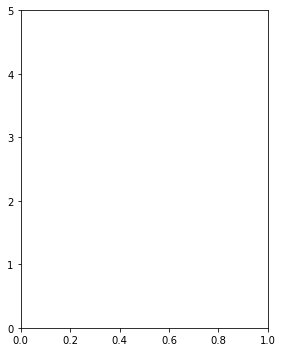

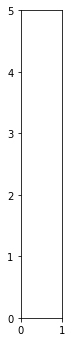

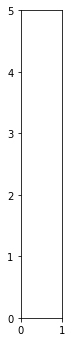

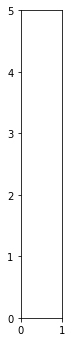

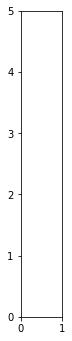

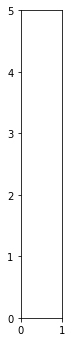

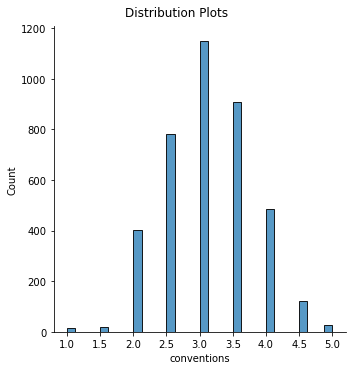

In [41]:
plot_rows=3
plot_cols=2
fig = make_subplots(rows=plot_rows, cols=plot_cols)

In [36]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hanjingshi/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [37]:
text = nltk.word_tokenize("And now for something completely different")
pos_tagger_result = nltk.pos_tag(text)
print(pos_tagger_result)

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]


In [ ]:
for i in train['full_text']:
    i = word_tokenize(i)
    pos_tagger = nltk.pos_tag(i)
    print(pos_tagger)

In [38]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [39]:
# similar words
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')
text.similar('bought')

man time day year car moment world house family child country boy
state job place way war girl work word
made said done put had seen found given left heard was been brought
set got that took in told felt
